<h1><center> Tópicos Avançados em Python para Análise de Dados </center></h1>

![](https://drive.google.com/uc?export=view&id=1qCH-jlzKK1aFaTBpiTHN4qxTFrCVs720) 

<center>
<h5>
O objetivo desse material é mostrar a você como aplicar diversos métodos das duas bibliotecas mais famosas para Ciência de Dados: Pandas e Seaborn. Ao longo do curso além de conhecermos como essas ferramentas funcionam vamos praticar a análise em dados reais e transformar os dados que temos em informações. 
Vamos nessa!
<h5>
<center>

## Módulo 5

### Exercício 2

Durante esse exercício vamos usar a mesma base de dados do **Exercício 1** procurando criar gráficos mais completos para auxiliar nas nossas análises

Os dados usados durante esse exercício foram obtidos a partir do relatório Women Entrepreneurship Index e Global Entrepreneurship Index publicado em 2015.A pesquisa é limitada aos países da OCDE, onde todos os dados de 2015 estão disponíveis ao mesmo tempo no banco de dados.Você consegue acessar mais informações através do [kaggle](https://www.kaggle.com/babyoda/women-entrepreneurship-and-labor-force).

A base de dados contém as seguintes informações: 

* **No** $\rightarrow$ ID do país em questão
* **Country** $\rightarrow$ nome do país
* **Level of development** $\rightarrow$ variável nominal para o índice de desenvolvimento
* **European Union Membership** $\rightarrow$ variável nominal para membros da União Europeia
* **Currency** $\rightarrow$ moeda presente no país
* **Women Entrepreneurship Index** $\rightarrow$ índice de empreendedorismo feminino 2015
* **Entrepreneurship Index** $\rightarrow$ índice de empreendedorismo 2015
* **Inflation rate** $\rightarrow$ taxa de inflação 2015
* **Female Labor Force Participation Rate** $\rightarrow$ taxa de participação feminina na força de trabalho de 2015

A partir dele, você deve obter informações sobre os dados guiado pelas perguntas e instruções abaixo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('women.csv', sep=';')

1) Crie três gráficos de barras informando:
* A quantidade de países desenvolvidos e em desenvolvimento;
* A quantidade de países membros e não membros da união europeia;
* A quantidade de países que usam moedas próprias e que usam euro.

Dica: veja como funciona o [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) do **Seaborn** e o [subplot](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html) do **Matplotlib**

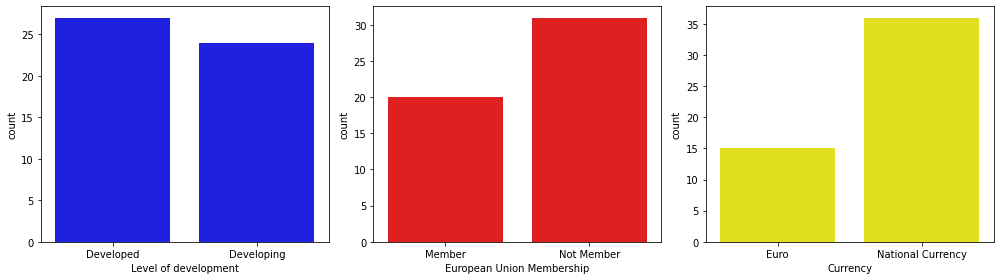

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))

sns.countplot(ax=axs[0],x='Level of development', data=data, color='blue')
sns.countplot(ax=axs[1], x='European Union Membership', data=data, color='red')
sns.countplot(ax=axs[2], x='Currency', data=data, color='yellow')

plt.tight_layout()
plt.show()

2) Identifique qual a correlação entre as colunas Women Entrepreneurship Index, Entrepreneurship Index, Inflation rate e Female Labor Force Participation Rate e, em seguida, crie um *heatmap* para visualizar os dados obtidos

In [ ]:
sub_data = data[['Women Entrepreneurship Index', 'Entrepreneurship Index', 'Inflation rate', 
                 'Female Labor Force Participation Rate']]

correlacao = sub_data.corr()
correlacao

,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
Women Entrepreneurship Index,1.000000,0.91458,-0.455532,0.441372
Entrepreneurship Index,0.914580,1.00000,-0.395370,0.334170
Inflation rate,-0.455532,-0.39537,1.000000,-0.139802
Female Labor Force Participation Rate,0.441372,0.33417,-0.139802,1.000000


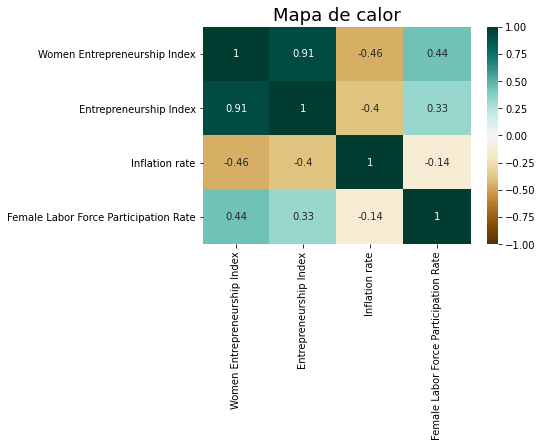

In [ ]:
sns.heatmap(correlacao, annot=True, vmin=-1, vmax=1, cmap='BrBG')
plt.title('Mapa de calor', fontsize=18)
plt.show()

3) O mapa de calor nada mais é do que uma matriz como os elementos abaixo da diagonal principal iguais aos acima da diagonal. Ao invés de criar o mapa completo, crie apenas como uma matriz triangular inferior.

Dica: veja sobre o parâmetro [mask](https://seaborn.pydata.org/generated/seaborn.heatmap.html) do **heatmap**

In [ ]:
mask = np.triu(np.ones_like(correlacao, dtype=bool))

mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

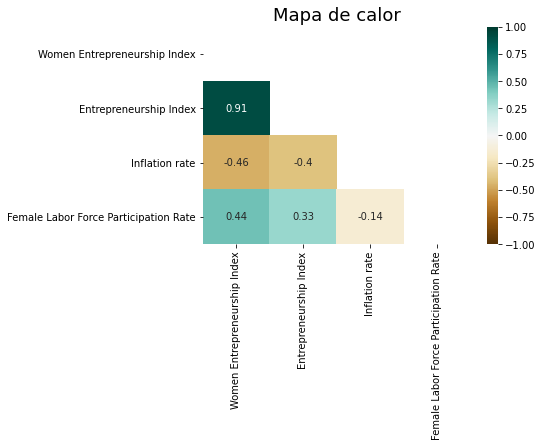

In [ ]:
sns.heatmap(correlacao, annot=True, vmin=-1, vmax=1, cmap='BrBG', mask=mask)
plt.title('Mapa de calor', fontsize=18)
plt.show()

4) De acordo com o mapa de calor gerado, crie dois gráficos de regressão com base nas duas correlações mais fortes (tanto negativas quanto positivas)

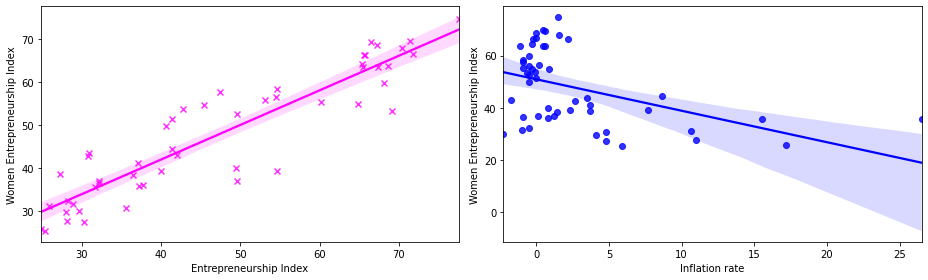

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13,4))

sns.regplot(ax = axs[0], x='Entrepreneurship Index', y ='Women Entrepreneurship Index', 
           data = data, marker='x', color='magenta')
sns.regplot(ax = axs[1], x='Inflation rate', y ='Women Entrepreneurship Index', 
           data = data, marker='o', color='blue')

plt.tight_layout()
plt.show()

5) Crie um violin plot usando a categoria criada ('classificacao') para visualizar a indice de empreendedorismo feminino e agrupe os dados (hue) de acordo com o nível de desenvolvimento. Em seguida, aplique um filtro na categoria *medio* para ver o comportamento dessa categoria.
O que você consegue observar através dos gráficos?

In [ ]:
bins = data['Women Entrepreneurship Index'].describe()[3:].values
data['classificacao'] = pd.cut(data['Women Entrepreneurship Index'], bins = bins,
                               labels = ['baixo', 'medio', 'alto', 'muito alto'], 
                               include_lowest=True)

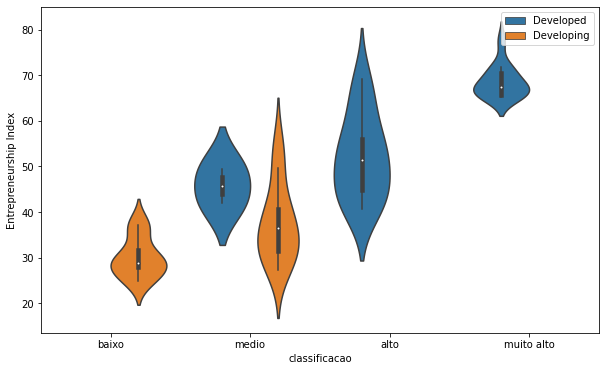

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='classificacao', y='Entrepreneurship Index', data=data, hue='Level of development')
plt.legend(loc='best') #mostar outras localizacoes
plt.show()

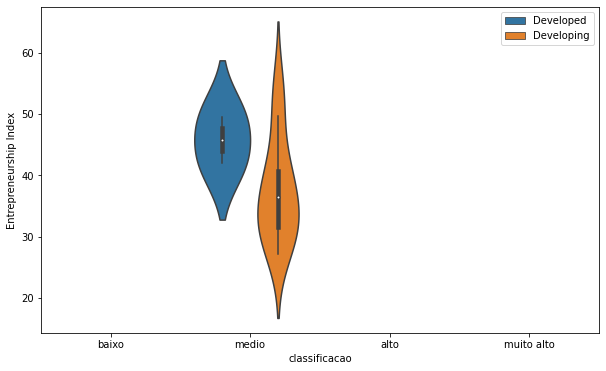

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='classificacao', y='Entrepreneurship Index', data=data[data.classificacao == 'medio'], hue='Level of development')
plt.legend(loc='best')
plt.show()

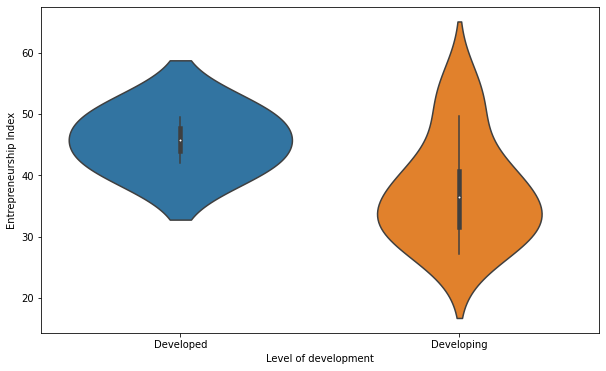

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Level of development', y='Entrepreneurship Index', data = data[data.classificacao == 'medio'])
plt.show()